In [1]:
import pickle
from src.aggregate_threes import abg_aggregate
import numpy as np

In [2]:
with open('data/processed/test_w_fp.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [3]:
agg_method = 'concat'

a = abg_aggregate(test, agg = agg_method)
for key in a.keys():
    test[f'{agg_method}_{key}'] = a[key]

In [7]:
feature_columns = [s for s in test.columns if agg_method in s]
target_column = 'cryst'

In [9]:
X = {}
for feature in feature_columns:
    X[feature] = [x for x in test[feature]] 
y = test[target_column]

In [11]:
y_pred = {}
y_pred_proba = {}
for feature in feature_columns:
    with open(f'saved_models/{feature}_xgb_model.pkl', 'rb') as handle:
        clf = pickle.load(handle)


    a = np.array(X[feature])
    
    y_pred[feature] = clf.predict(a)
    y_pred_proba[feature] = clf.predict_proba(a)
    y_probs = [x[1] for x in y_pred_proba[feature]]

    pred_file = f'predictions/{feature}_pred.pkl'  
    with open(pred_file, 'wb') as handle:  
        pickle.dump(y_pred[feature], handle)
        
    pred_prob_file = f'predictions/{feature}_pred_proba.pkl'  
    with open(pred_prob_file, 'wb') as handle:  
        pickle.dump(y_probs, handle)

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

Prediction with concat_rdkit: F1 - 0.5882352941176471, ROC-AUC - 0.8793103448275862


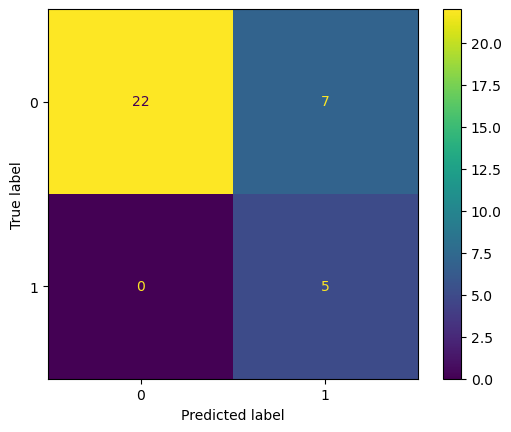

In [13]:
for feature in feature_columns:
    with open(f'predictions/{feature}_pred.pkl', 'rb') as handle:
        y_pred = pickle.load(handle)
    print(f'Prediction with {feature}: F1 - {f1_score(y, y_pred)}, ROC-AUC - {roc_auc_score(y, y_pred)}')
    conf = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))
    conf.plot()